rays aperture 0.0
rays aperture 0.75930786


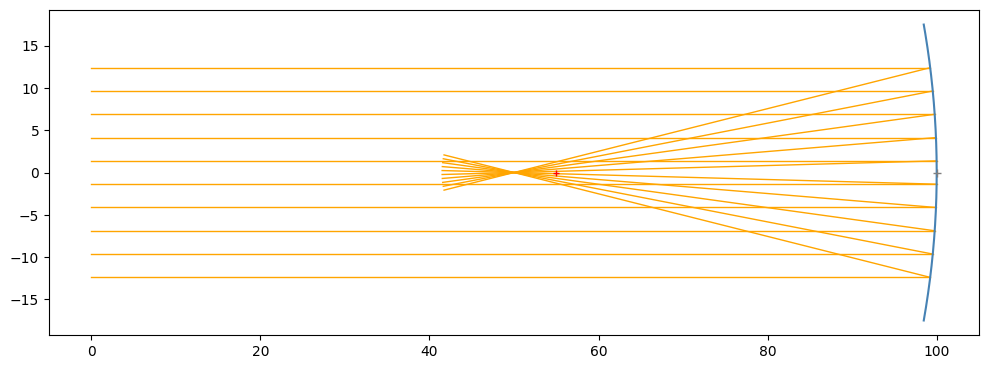

[  0/60] L=  0.613 | grad norm= 2211.3046875
[  3/60] L=  0.133 | grad norm= 1029.4169921875
[  6/60] L=  0.000 | grad norm= 8.094154357910156
[  9/60] L=  0.059 | grad norm= 679.9329223632812
[ 12/60] L=  0.093 | grad norm= 854.3804321289062
[ 15/60] L=  0.053 | grad norm= 644.3590698242188
[ 18/60] L=  0.008 | grad norm= 249.65866088867188
[ 21/60] L=  0.003 | grad norm= 141.02737426757812
[ 24/60] L=  0.018 | grad norm= 378.5186767578125
[ 27/60] L=  0.020 | grad norm= 401.1578063964844
[ 30/60] L=  0.008 | grad norm= 250.41627502441406
[ 33/60] L=  0.000 | grad norm= 29.872419357299805


[ 36/60] L=  0.003 | grad norm= 149.22183227539062
[ 39/60] L=  0.006 | grad norm= 215.40367126464844
[ 42/60] L=  0.003 | grad norm= 163.53768920898438
[ 45/60] L=  0.000 | grad norm= 45.31953048706055
[ 48/60] L=  0.001 | grad norm= 66.0213623046875
[ 51/60] L=  0.002 | grad norm= 115.46472930908203
[ 54/60] L=  0.001 | grad norm= 91.44921112060547
[ 57/60] L=  0.000 | grad norm= 24.018930435180664


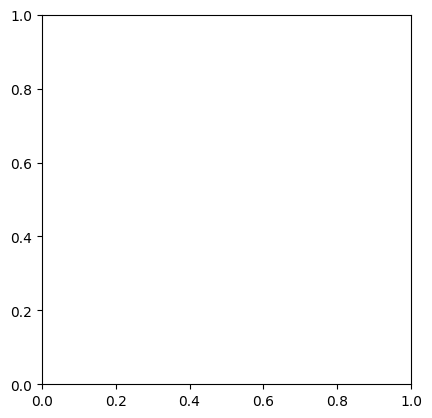

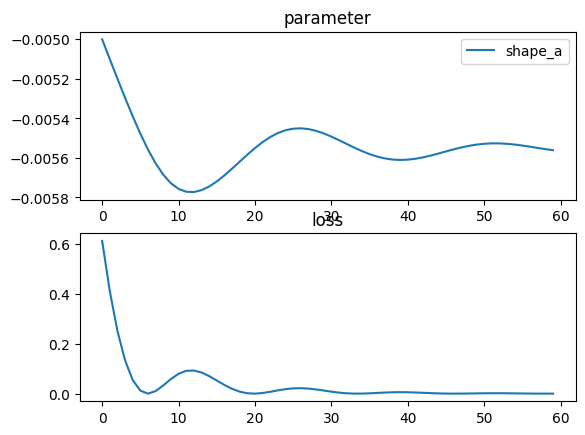

rays aperture 0.0
rays aperture 0.8451996


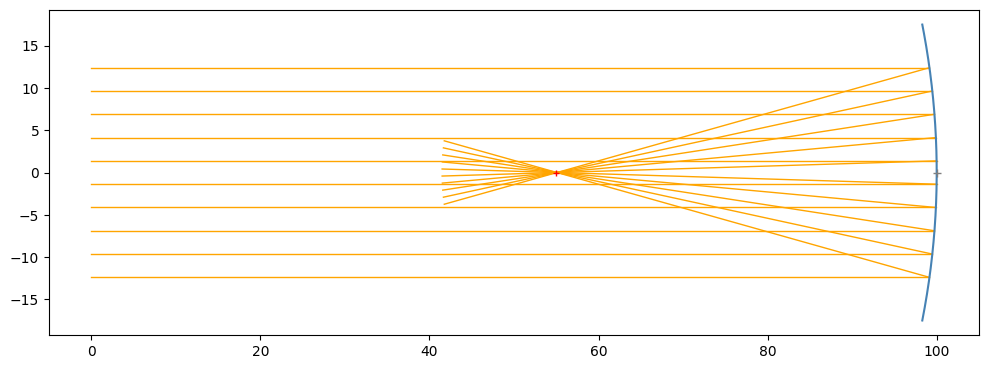

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchlensmaker as tlm


class Optics(tlm.Module):
    def __init__(self):
        super().__init__()

        self.shape = tlm.Parabola(height=35., a=nn.Parameter(torch.tensor(-0.005)))

        self.optics = tlm.OpticalSequence(
            tlm.PointSourceAtInfinity(beam_diameter=25),
            tlm.Gap(100.),
            
            tlm.ReflectiveSurface(self.shape),
            
            tlm.Gap(-45.0),
            tlm.FocalPoint(),
        )

    def forward(self, inputs, sampling):
        return self.optics(inputs, sampling)

optics = Optics()

tlm.render_plt(optics)

tlm.optimize(
    optics,
    optimizer = optim.Adam(optics.parameters(), lr=1e-4),
    sampling = {"rays": 10},
    num_iter = 60
)

tlm.render_plt(optics)